In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [109]:

year = np.arange(1901, 2021) # data from https://www.ined.fr/fr/tout-savoir-population/chiffres/bases-donnees/population-de-la-france-series-longues/
dc = list(np.loadtxt('datas/yearly_deaths.txt'))
births = list(np.loadtxt('datas/yearly_births.txt'))
dc.append(659941-14000) # data from https://www.lemonde.fr/les-decodeurs/article/2021/01/08/le-nombre-de-deces-en-2020-est-nettement-superieur-a-celui-de-l-annee-2019_6065652_4355770.html
# autre source (sans 2020): https://www.insee.fr/fr/statistiques/4804802?sommaire=4772633


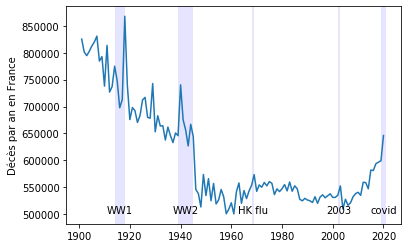

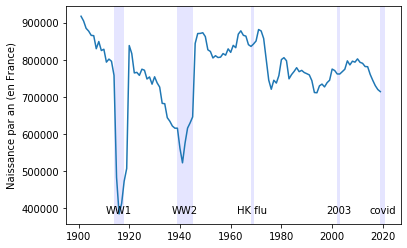

In [117]:
def show_date(start, end, label):
    ax = plt.gca()
    m,M = ax.get_ylim()
    plt.fill([start, end, end, start],[m, m, M, M], 'b', alpha=0.1)
    plt.text((end+start)/2, m*0.95+M*0.05, label, horizontalalignment='center')
    plt.ylim([m,M])
def show_all():
    show_date(1914, 1918, 'WW1')
    show_date(1939, 1945, 'WW2')
    show_date(2019, 2021, 'covid')
    show_date(1968, 1969, 'HK flu')
    show_date(2002, 2003, '2003')

fig = plt.figure()
plt.plot(year, dc)
show_all()
plt.ylabel('Décès par an en France')

plt.figure()
plt.plot(year[:-1], births)
plt.ylabel('Naissance par an (en France)')
show_all()

Text(0, 0.5, 'Increase compared to last mean of last 5 year (in %)')

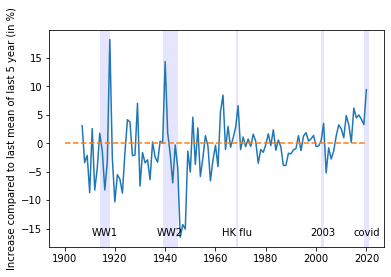

In [108]:
cumsum = np.cumsum(dc)
rolling = cumsum[5:-1]-cumsum[:-6]

#plt.plot(year[6:], 5*dc[6:]/rolling)
plt.plot(year[6:], 500*np.array(dc[6:]/rolling)-100)
plt.plot([1900,2020],[0,0],'--')
show_all()
plt.ylabel('Increase compared to last mean of last 5 year (in %)')